Prueba Final 
Modelos y aprendizajes
Identificación de pacientes con cáncer
Susana Caraguay
Octubre-2022

In [34]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
with  open('./wdbc.data') as file:
      df_origen=pd.read_csv(file,header= None)
      df_origen.columns= ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']


In [36]:
df_origen

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

Limpieza de datos. 
Verificación de nulos.  Datos inconsistentes y/o cambio a numerico
Asigno el dataframe df que contendrá los datos preprocesados

In [37]:
df=df_origen
df.isnull().values.any()

False

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Mapeo los datos de la columna diagnosis, transformo a numérico y elimino la columna id

In [39]:
df['diagnosis'] = df['diagnosis'].map({'M': 1,'B': 0})
df['diagnosis']=df['diagnosis'].astype(float)
df.drop(['id'], axis = 1, inplace = True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [41]:

df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1.0        17.99         10.38          122.80     1001.0   
1          1.0        20.57         17.77          132.90     1326.0   
2          1.0        19.69         21.25          130.00     1203.0   
3          1.0        11.42         20.38           77.58      386.1   
4          1.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        1.0        21.56         22.39          142.00     1479.0   
565        1.0        20.13         28.25          131.20     1261.0   
566        1.0        16.60         28.08          108.30      858.1   
567        1.0        20.60         29.33          140.10     1265.0   
568        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

Procedemos a separa las variable objetivo (y) del resto de variables

In [42]:
X = df.loc[ : , df.columns != 'diagnosis'] 
y = df.loc[ : , df.columns =='diagnosis']  

In [43]:
df['diagnosis'].value_counts()

0.0    357
1.0    212
Name: diagnosis, dtype: int64

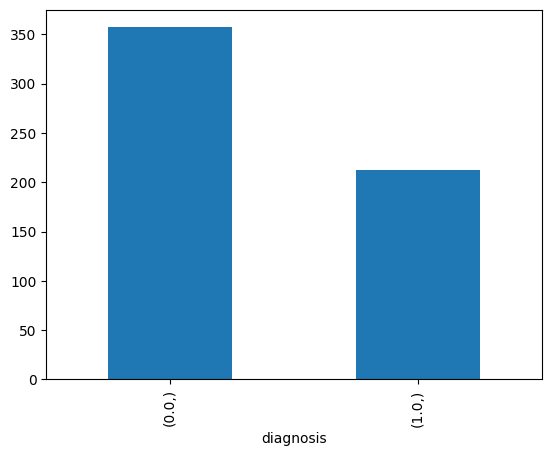

In [44]:
y.value_counts().plot(kind='bar');

<AxesSubplot:>

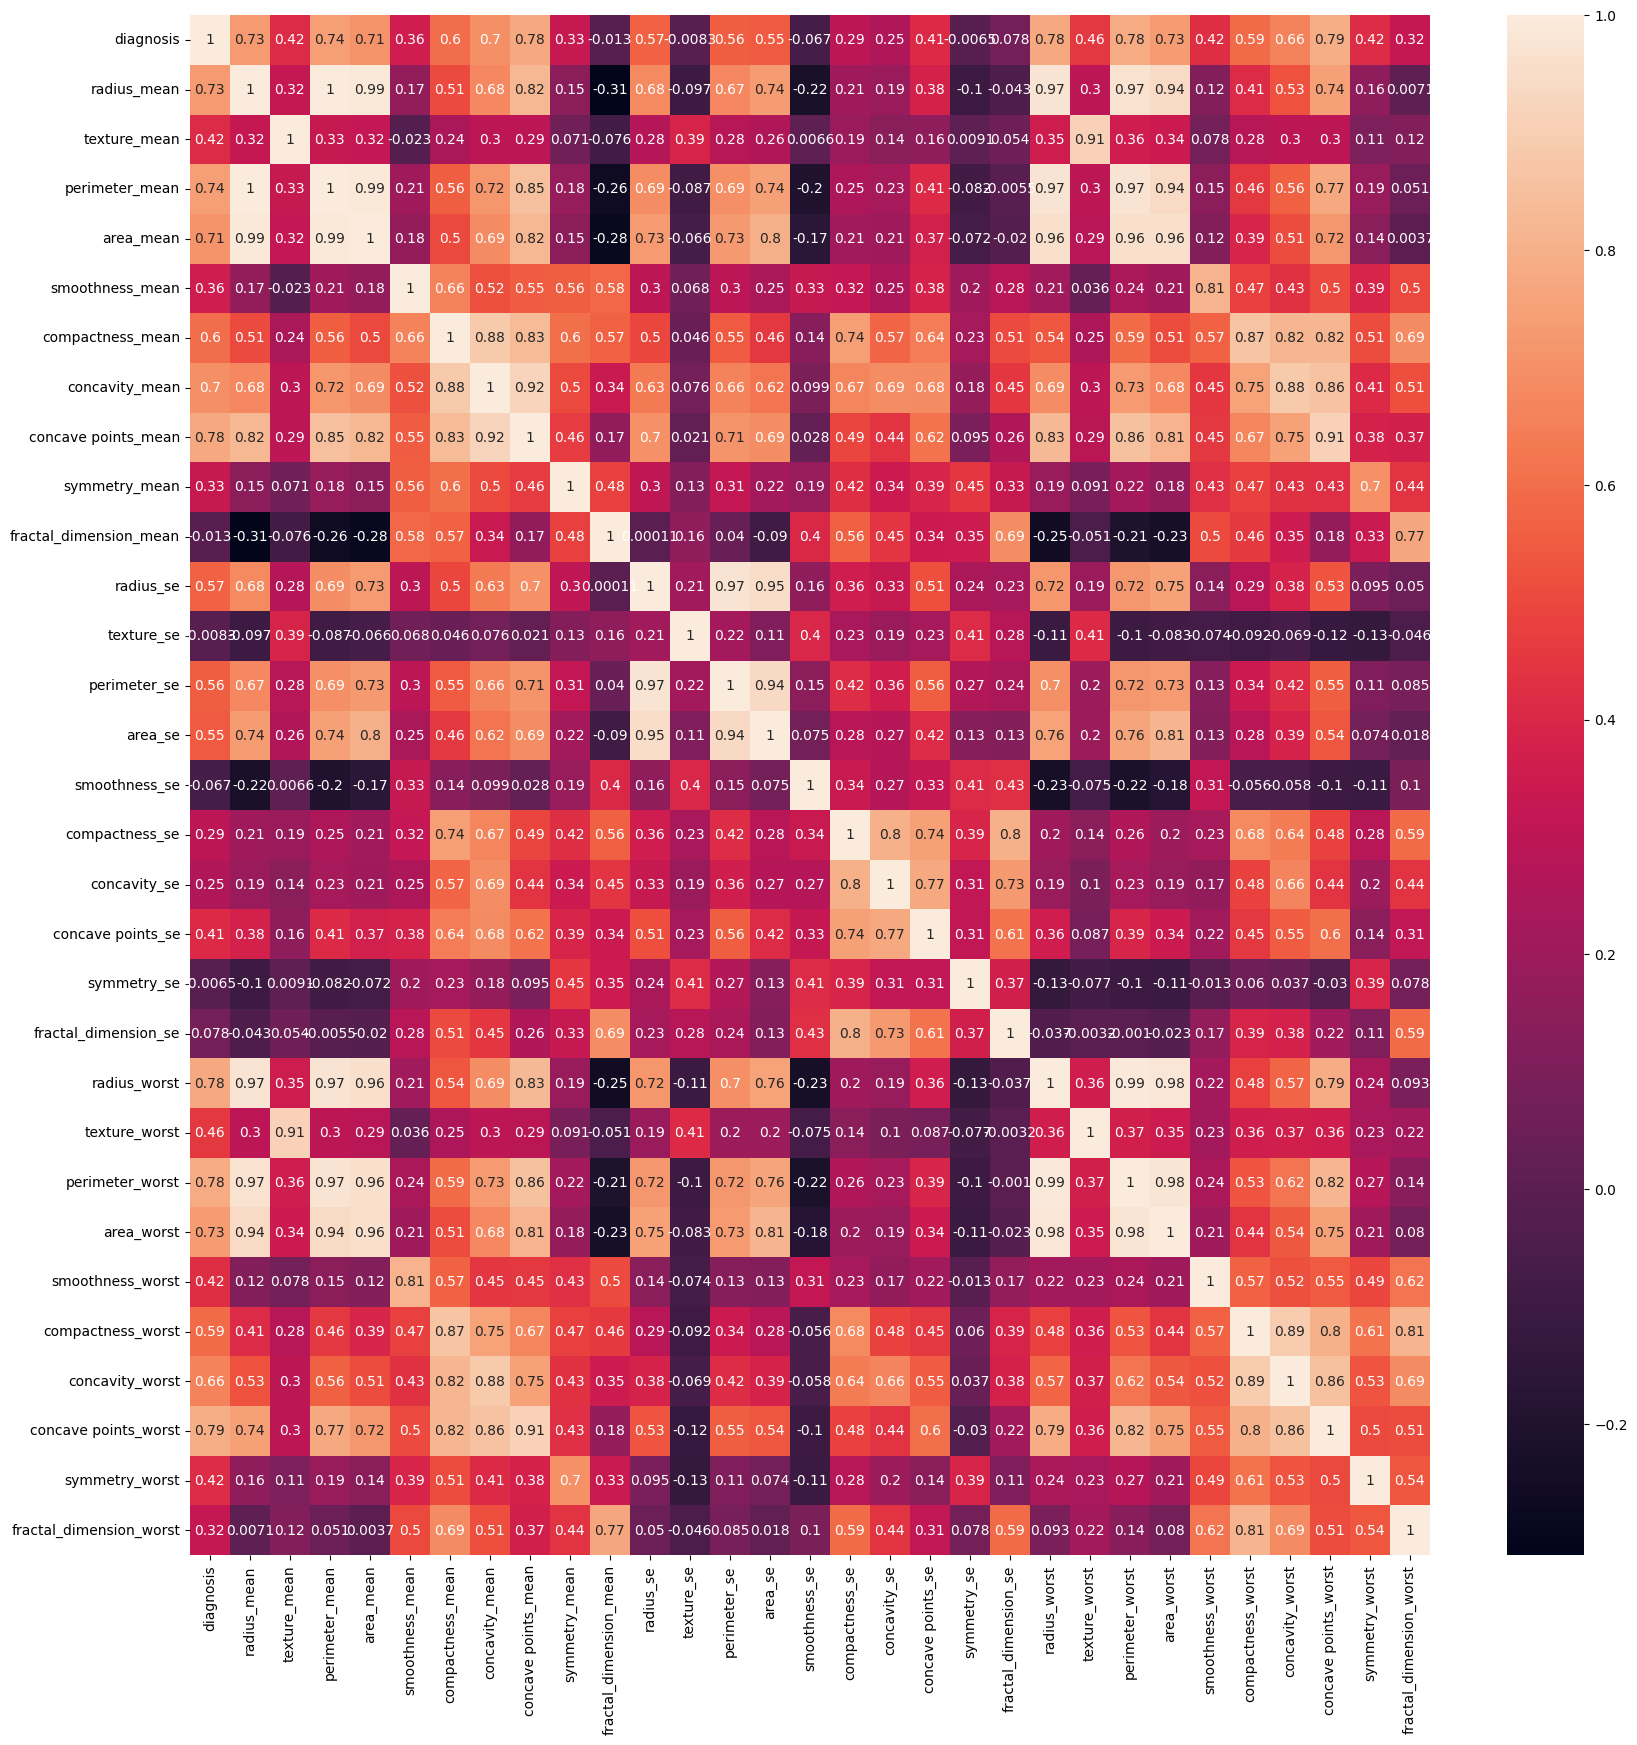

In [45]:
#grafico la matriz de correlación
matriz_corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matriz_corr,annot = True)

In [46]:
#elimino las de mas alta correlación >0.97
#df.drop(['perimeter_mean','radius_mean','area_mean','radius_worst','perimeter_worst','area_worst','area_mean','radius_se','perimeter_se'], axis = 1, inplace = True)

df.drop(['perimeter_mean','radius_mean','area_mean','radius_worst','perimeter_worst','area_worst','area_mean','radius_se','perimeter_se','area_se','concave points_worst','compactness_worst','texture_mean','concavity_mean','concave points_mean','compactness_mean','concavity_worst','texture_worst'], axis = 1, inplace = True)


#['perimeter_mean','radius_mean','area_mean','radius_worst','perimeter_worst','area_worst','area_mean','radius_se','perimeter_se','area_se','concave_points_worst','compactness_worst','texture_mean','concavity_mean','concave_points_mean','compactness_mean','concavity_worst','texture_worst']


In [47]:
df.describe()

diagnosis  smoothness_mean  symmetry_mean  fractal_dimension_mean  \
count  569.000000       569.000000     569.000000              569.000000   
mean     0.372583         0.096360       0.181162                0.062798   
std      0.483918         0.014064       0.027414                0.007060   
min      0.000000         0.052630       0.106000                0.049960   
25%      0.000000         0.086370       0.161900                0.057700   
50%      0.000000         0.095870       0.179200                0.061540   
75%      1.000000         0.105300       0.195700                0.066120   
max      1.000000         0.163400       0.304000                0.097440   

       texture_se  smoothness_se  compactness_se  concavity_se  \
count  569.000000     569.000000      569.000000    569.000000   
mean     1.216853       0.007041        0.025478      0.031894   
std      0.551648       0.003003        0.017908      0.030186   
min      0.360200       0.001713        0.002252      0.000000   
25%      0.833900       0.005169        0.013080      0.015090   
50%      1.108000       0.006380        0.020450      0.025890   
75%      1.474000       0.008146        0.032450      0.042050   
max      4.885000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  smoothness_worst  \
count         569.000000   569.000000            569.000000        569.000000   
mean            0.011796     0.020542              0.003795          0.132369   
std             0.006170     0.008266              0.002646          0.022832   
min             0.000000     0.007882              0.000895          0.071170   
25%             0.007638     0.015160              0.002248          0.116600   
50%             0.010930     0.018730              0.003187          0.131300   
75%             0.014710     0.023480              0.004558          0.146000   
max             0.052790     0.078950              0.029840          0.222600   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500

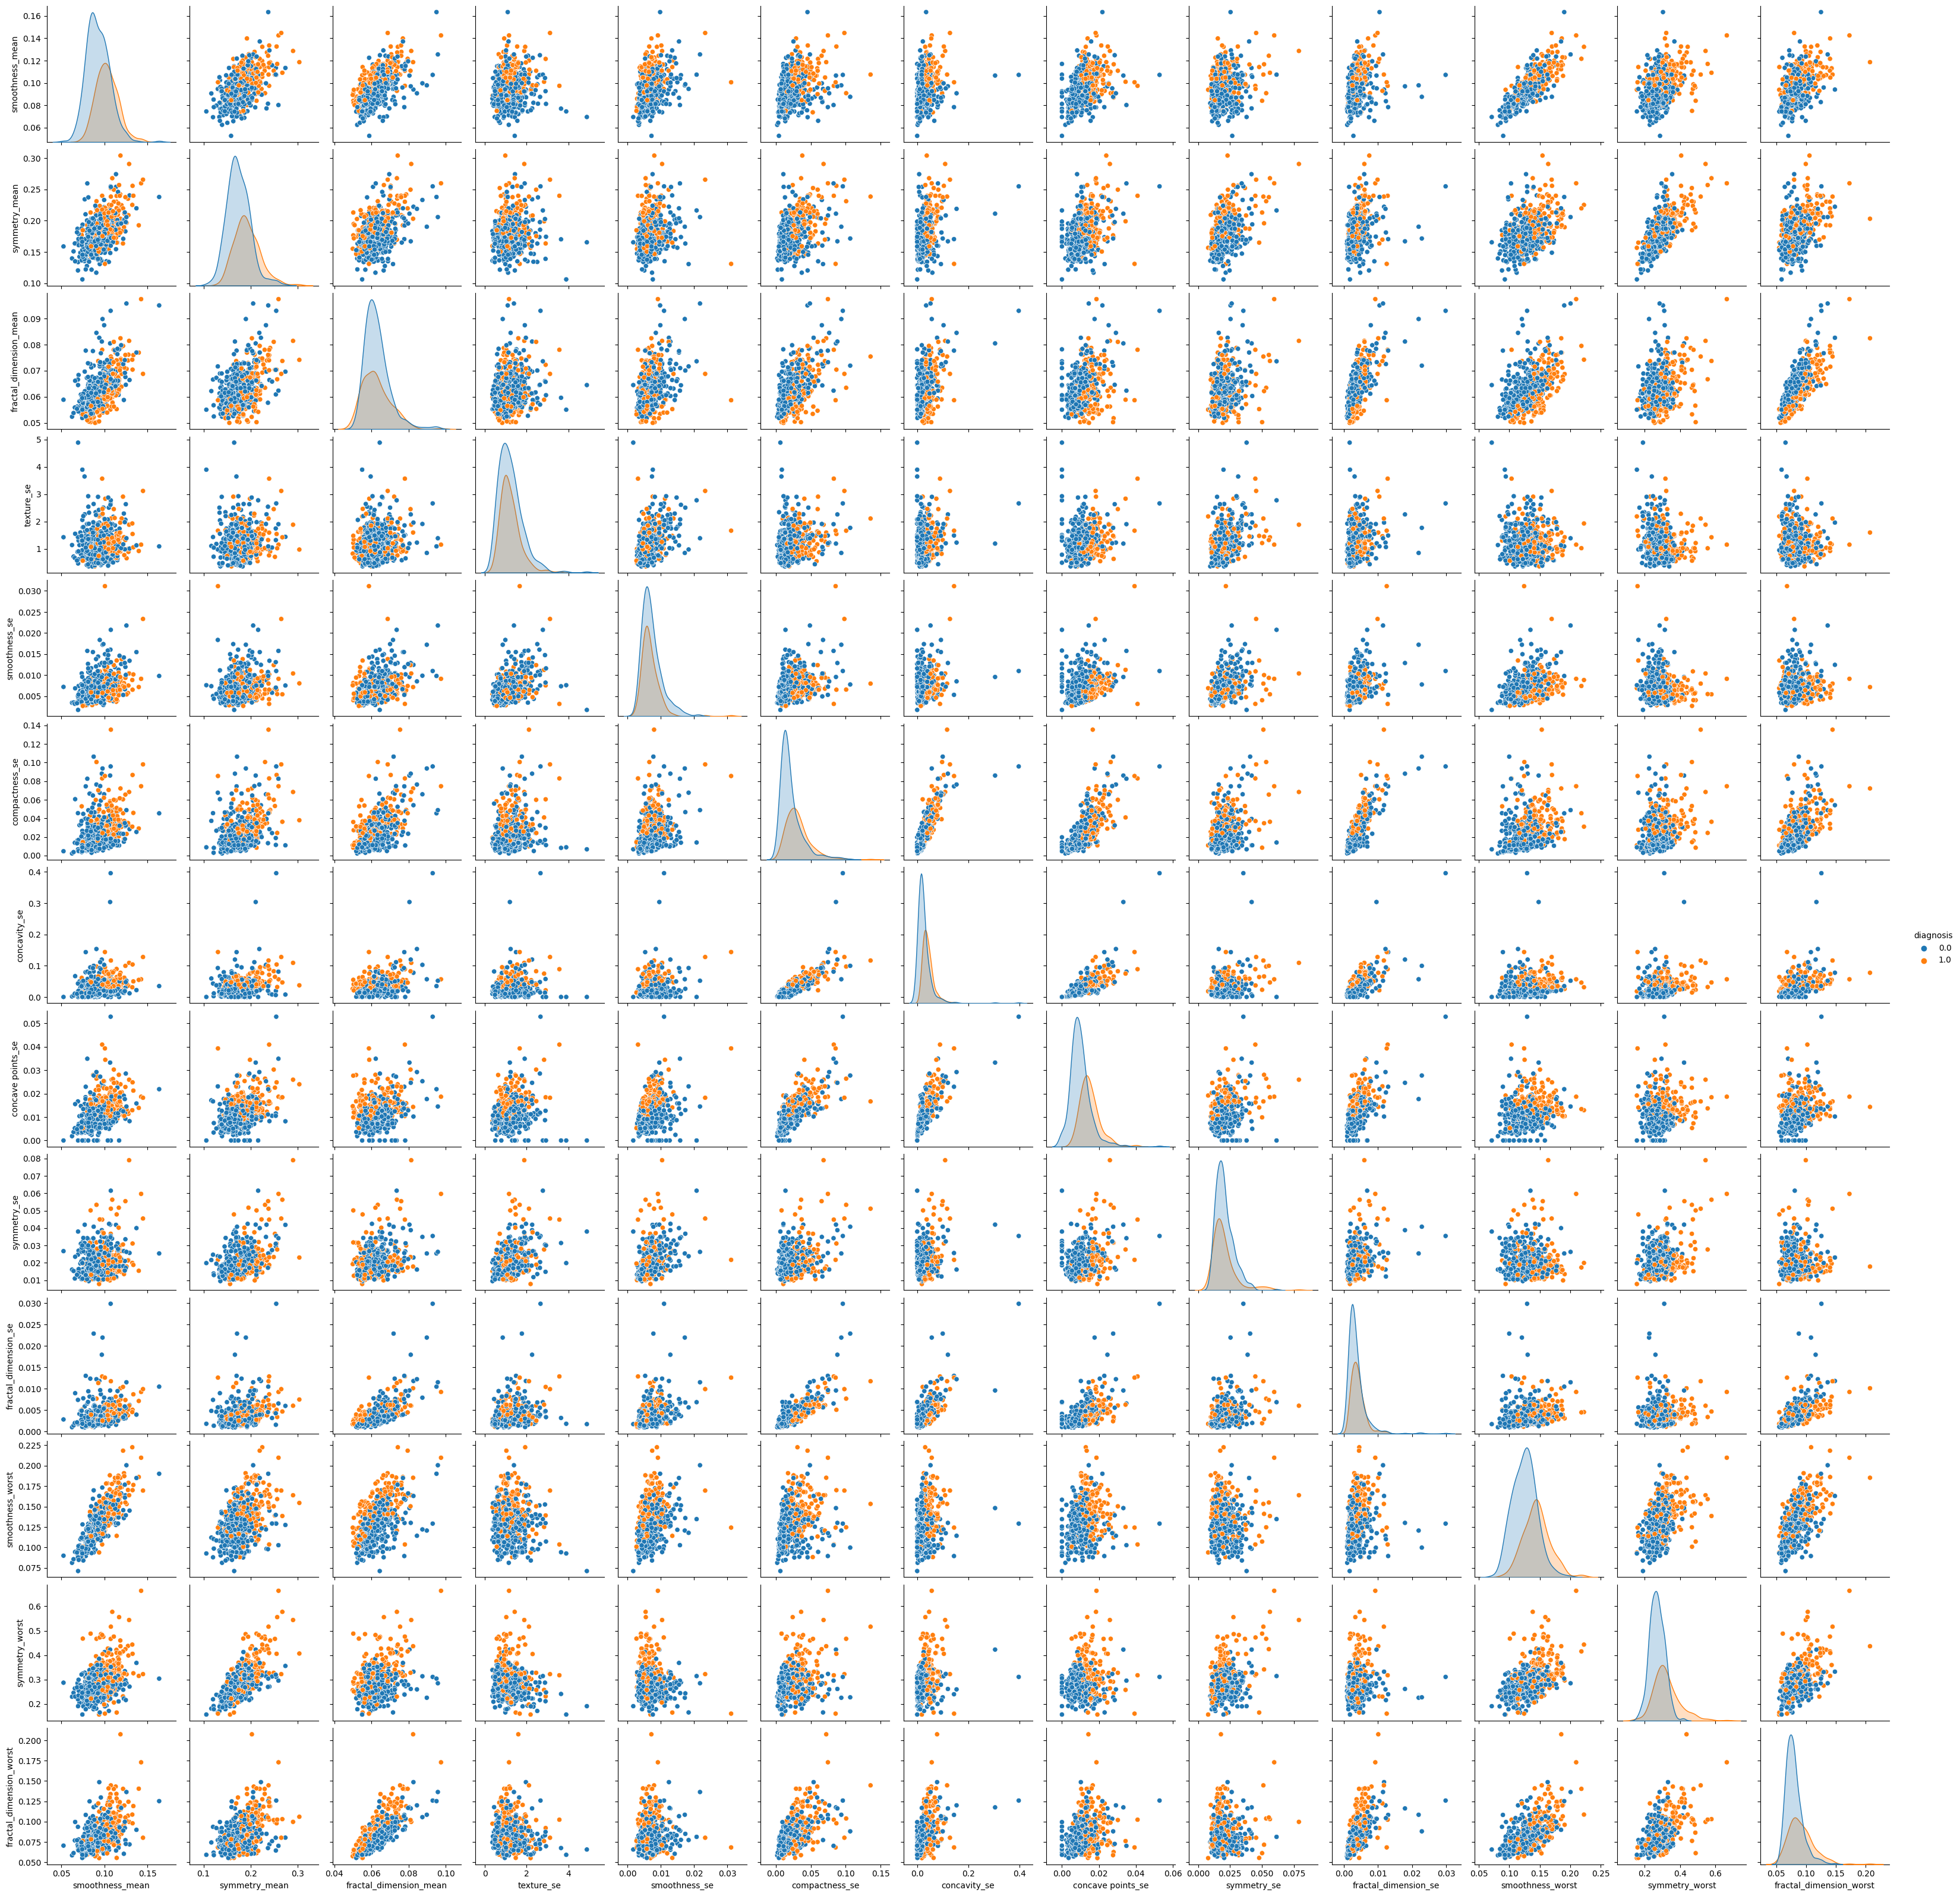

In [48]:
sns.pairplot(data=df,hue="diagnosis")

array([[<AxesSubplot:title={'center':'texture_se'}>]], dtype=object)

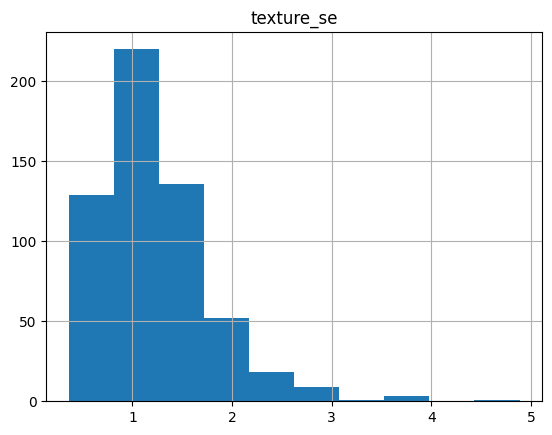

In [49]:
df.hist(column='texture_se')

MODELADO 

In [50]:
#SEGMENTO LA INFORMACIÓN PARA TEST Y TRAIN
# Realizo la división en datos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% 

MODELO #1 MODELO DE CLASIFICACION (Arbol de decisiones)

In [51]:
#MODELO DE CLASIFICACION DE ARBOL CON PROFUNDIDAD POR DEFECTO
#Instancia el modelo, esta primera instanciación la realizo con los valores por defecto
clf = tree.DecisionTreeClassifier()
# Entreno el modelo
clf = clf.fit(X_train,y_train) 


[Text(0.4166666666666667, 0.9166666666666666, 'X[22] <= 104.95\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.19047619047619047, 0.75, 'X[27] <= 0.135\ngini = 0.049\nsamples = 237\nvalue = [231, 6]'),
 Text(0.09523809523809523, 0.5833333333333334, 'X[13] <= 48.975\ngini = 0.009\nsamples = 225\nvalue = [224, 1]'),
 Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.0\nsamples = 222\nvalue = [222, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'X[0] <= 12.265\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'X[21] <= 26.9\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.23809523809523808, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[18] <= 0.014\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(

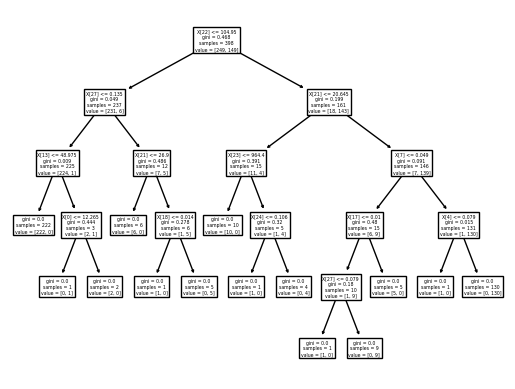

In [52]:
# Dibujo el árbol. Este arbol tuvo los parámetros por defecto , es decir no puse el valor depth para limitar sus niveles
from sklearn import tree
tree.plot_tree(clf)

[[249   0]
 [  0 149]]
Accuracy Train:  1.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


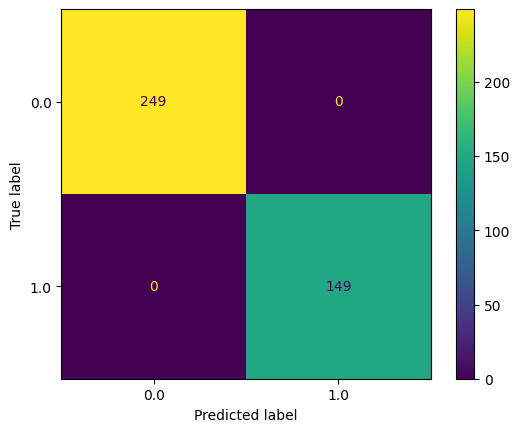

In [68]:
 # matriz de confusión (entrenamient0)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_train, y_train)  
print("Accuracy Train: ", accuracy_score(y_train, y_pred))

Accuracy: 0.935672514619883
[[106   2]
 [  9  54]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

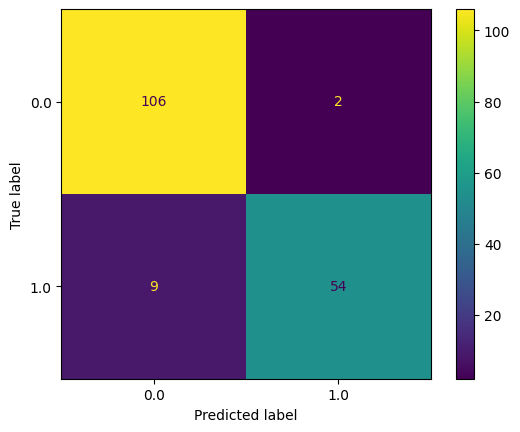

In [53]:
# Evaluación del modelo en TEST, con esta funcion puedo conocer precisión del modelo, comparo valores del conjunto de prueba contra los de prediccion

#Realiz la predicción
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)
plt.show

MOdelo delimitando profundidad de 3

In [54]:
#afino el modelo limitando la profundidad a 3
clf = tree.DecisionTreeClassifier(max_depth=3)
# Entreno el modelo
clf = clf.fit(X_train,y_train) 

In [ ]:
 # matriz de confusión (entrenamient0)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_train, y_train)  
print("Accuracy Train: ", accuracy_score(y_train, y_pred))

Accuracy: 0.8830409356725146
[[96 12]
 [ 8 55]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

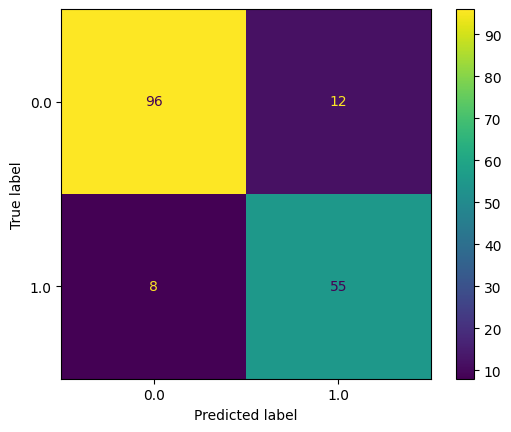

In [55]:
# Evaluación del modelo en TEST, con esta funcion puedo conocer precisión del modelo, comparo valores del conjunto de prueba contra los de prediccion

#Realiz la predicción
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)
plt.show

MODELO #2 MODELO SGDClassifier

In [56]:
clf = SGDClassifier(loss="log")
clf = clf.fit(X_train,y_train) 

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
 # matriz de confusión (entrenamient0)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_train, y_train)  
print("Accuracy Train: ", accuracy_score(y_train, y_pred))

Accuracy: 0.8947368421052632
[[106   2]
 [ 16  47]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

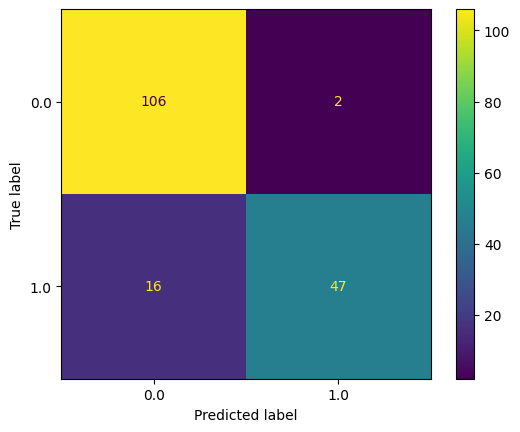

In [57]:
# Evaluación del modelo en TEST, con esta funcion puedo conocer precisión del modelo, comparo valores del conjunto de prueba contra los de prediccion

#Realiz la predicción
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)
plt.show

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A 

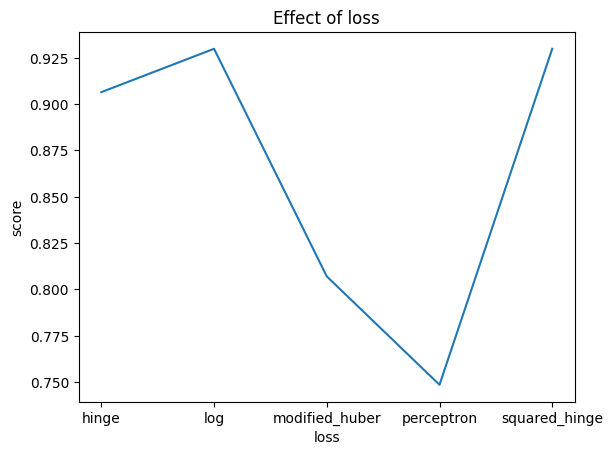

In [58]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

MODELO#3 REGRESION LOGISTICA

In [59]:

model = LogisticRegression( max_iter=100,
                                   random_state=42)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test) 
Y_true = y_test 
Y_pred

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0.])

In [ ]:
 # matriz de confusión (entrenamient0)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_train, y_train)  
print("Accuracy Train: ", accuracy_score(y_train, y_pred))

Accuracy: 0.9298245614035088
[[102   6]
 [  6  57]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

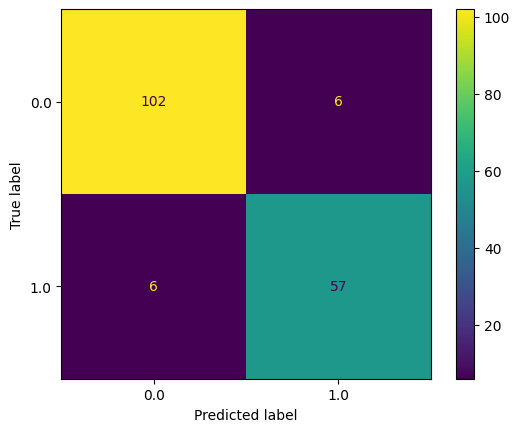

In [60]:
# Evaluación del modelo en TEST, con esta funcion puedo conocer precisión del modelo, comparo valores del conjunto de prueba contra los de prediccion

#Realiz la predicción
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(model, X_test, y_test)
plt.show

MODELO #4 Support Vector

In [61]:
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train, y_train)
 #prediccion
y_pred = svm.predict(X_test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
 # matriz de confusión (entrenamient0)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_train, y_train)  
print("Accuracy Train: ", accuracy_score(y_train, y_pred))

Accuracy: 0.9415204678362573
[[105   3]
 [  7  56]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

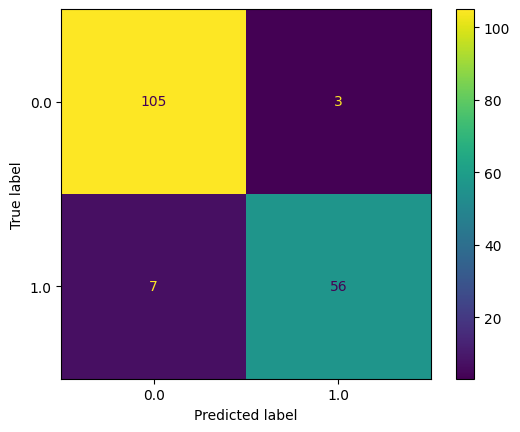

In [62]:
#evaluo modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(svm, X_test, y_test)
plt.show

MODELO#5 KNeighborsClassifier

In [63]:
clf = KNeighborsClassifier (n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
 # matriz de confusión (entrenamient0)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_train, y_train)  
print("Accuracy Train: ", accuracy_score(y_train, y_pred))

Accuracy: 0.9298245614035088
[[103   5]
 [  7  56]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

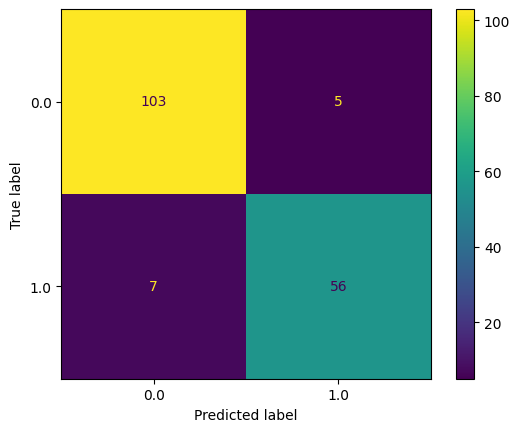

In [64]:
#Realiz la predicción
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)
plt.show

modelo #6 random forest


In [65]:
clf = RandomForestClassifier(max_depth=5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21612\2037680883.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [ ]:
 # matriz de confusión (entrenamient0)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_train, y_train)  
print("Accuracy Train: ", accuracy_score(y_train, y_pred))

Accuracy: 0.9590643274853801
[[106   2]
 [  5  58]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

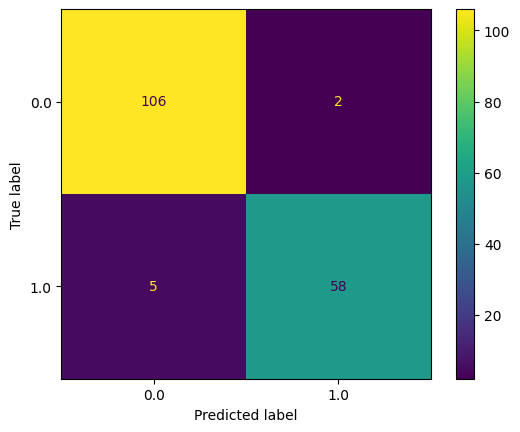

In [66]:
#Realiz la predicción
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)
plt.show